In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import torch
import random
import argparse
import numpy as np
import scipy
from matplotlib import pyplot
import numpy

sys.path.append('../../timeseries/')
sys.path.append('../../timeseries/experiments_scripts/')
sys.path.append('../../src/')

import factors
import state_models
import observation_models
from ssm_em import StateSpaceEM
from nonlinear_ssm import NonLinearStateSpace_EM

from scipy.stats import norm
from scipy.stats import zscore
from ssm_em import StateSpaceEM, load_model
from sklearn.covariance import EmpiricalCovariance
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.gaussian_process.kernels import ExpSineSquared, RBF

from exp_utils import *

def reset_seeds(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    

In [2]:
seed = 0
reset_seeds(seed)
x_tr, x_va, x_te, x_te_na, s_tr_x = load_energy_e1()

In [3]:
D = x_tr.shape[1]

In [5]:

from ssm import HMM

val_llk = numpy.empty([20,10])

for k in range(1,21):
    for i in range(10):
        model = HMM(k, D, observations="studentst")
        model.fit(x_tr, method="em")
        val_llk[k-1,i] = model.log_likelihood(x_va)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [6]:
best_k = numpy.argmax(numpy.mean(val_llk, axis=1)) + 1
test_llk = numpy.empty(10)
for i in range(10):
    model = HMM(best_k, D, observations="studentst")
    llk = model.fit(x_tr, method="em")
    test_llk[i] = model.log_likelihood(x_te)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
numpy.mean(test_llk)

-1735.914060186508

In [9]:
x_te_corrupted = numpy.copy(x_te)
x_te_corrupted[100:300,:] -= numpy.linspace(0,10,200)[:,None]

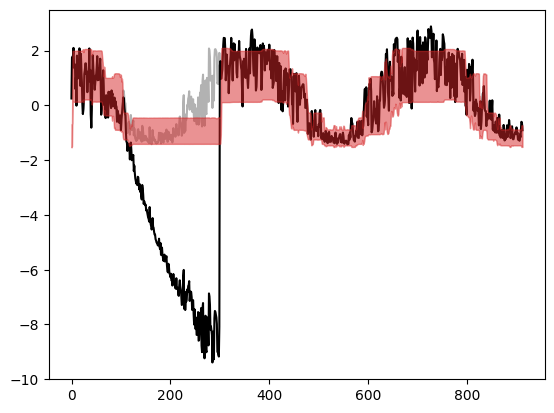

In [11]:
states = model.filter(x_te_corrupted)
mu = numpy.dot(states, model.observations.mus)
#mu = numpy.sum(states[:,:,None] * (numpy.sum(model.observations.As[None] * x_te_corrupted[:,None, None],axis=3) + model.observations.bs), axis=1)
std = numpy.dot(states, numpy.sqrt(model.observations.Sigmas.diagonal(axis1=1, axis2=2)))
lb, ub = mu - 1.96 * std, mu + 1.96 * std
pyplot.rcdefaults()
pyplot.plot(x_te_corrupted[:,0], 'k')
pyplot.plot(x_te[:,0], 'k', alpha=.3)
#pyplot.plot(mean)
pyplot.fill_between(range(mu.shape[0]), lb[:,0], ub[:,0], color='C3', zorder=9, alpha=.5)

In [390]:
mu.shape

(913, 913, 4)

In [221]:
test_hmm = HMM(20, 1, observations="gaussian")
test_hmm.fit(x_tr)

  0%|          | 0/100 [00:00<?, ?it/s]

[-1714.879611324606,
 -1714.879611324606,
 -1240.8031220061962,
 -685.4061702113357,
 -512.3489399990589,
 -457.713158618852,
 -430.4951838657943,
 -413.06344451759725,
 -400.88252027152913,
 -391.8942578862231,
 -384.7163455028579,
 -378.91402412029777,
 -374.01905840451417,
 -369.10024634522694,
 -362.5839644215534,
 -351.31571161084906,
 -325.82183656930175,
 -129.50925760035045,
 24.439936383511803,
 28.555292059335432,
 33.73848114929417,
 38.39571556865148,
 42.12978387010904,
 45.46044549542296,
 48.718634121338916,
 51.92895819823167,
 55.005626170135855,
 57.93681145480743,
 60.68398971962835,
 63.26261877854528,
 65.8413572791517,
 68.55210618702498,
 71.68607516513457,
 74.8950311122189,
 78.32627543574282,
 82.25788642805479,
 86.16663036682279,
 89.42999201602392,
 92.23220755574685,
 95.03012119746654,
 97.62469873473769,
 99.56905995837245,
 101.0650402436454,
 102.37173857568243,
 103.40762194390719,
 104.03668095046639,
 104.405038765501,
 104.64212030636969,
 104.8123

In [299]:
import autograd.numpy as np
import autograd.numpy.random as npr
npr.seed(0)

import matplotlib
import matplotlib.pyplot as plt

import ssm
from ssm.util import find_permutation

# Set the parameters of the HMM
T = 500     # number of time bins
K = 5       # number of discrete states
D = 2       # number of observed dimensions

# Make an HMM with the true parameters
true_hmm = ssm.HMM(K, D, observations="diagonal_gaussian")
z, y = true_hmm.sample(T)
z_test, y_test = true_hmm.sample(T)
true_ll = true_hmm.log_probability(y)

# Fit models
N_sgd_iters = 1000
N_em_iters = 100
D = 1

# A bunch of observation models that all include the
# diagonal Gaussian as a special case.
observations = [
    "gaussian",
    "studentst",
]

# Fit with both SGD and EM
methods = ["em", "sgd"]

results = {}
for obs in observations:
    for method in methods:
        print("Fitting {} HMM with {}".format(obs, method))
        model = ssm.HMM(10, D, observations=obs)
        train_lls = model.fit(x_tr, method=method)[-1]
        test_ll = model.log_likelihood(x_te)
        smoothed_y = model.smooth(x_te)

        # Permute to match the true states
        #model.permute(find_permutation(z, model.most_likely_states(x_tr)))
        #smoothed_z = model.most_likely_states(x_tr)
        results[(obs, method)] = (model, train_lls, test_ll, smoothed_y)

Fitting gaussian HMM with em


  0%|          | 0/100 [00:00<?, ?it/s]

Fitting gaussian HMM with sgd


  0%|          | 0/1000 [00:00<?, ?it/s]

Fitting studentst HMM with em


  0%|          | 0/100 [00:00<?, ?it/s]

Fitting studentst HMM with sgd


  0%|          | 0/1000 [00:00<?, ?it/s]

In [298]:
results

{('gaussian', 'em'): (<ssm.hmm.HMM at 0x7f243f605a30>,
  10.851764183952305,
  -639.906476261885,
  array([[-0.92094746],
         [-0.92817366],
         [-0.93216952],
         ...,
         [ 0.1168992 ],
         [-0.07915437],
         [-0.14481344]])),
 ('studentst', 'em'): (<ssm.hmm.HMM at 0x7f2437b715e0>,
  -62.19224682700638,
  -682.5001023472856,
  array([[ 0.24151549],
         [-0.48340765],
         [-0.7028247 ],
         ...,
         [ 0.20581862],
         [-0.20434063],
         [-0.23551357]]))}

In [256]:
from ssm.model_selection import cross_val_scores

In [261]:
cross_val_scores(model, datas=x_tr, held_out=.2)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

(array([0., 0., 0.]), array([-0.39900563, -0.40547551, -0.41447112]))

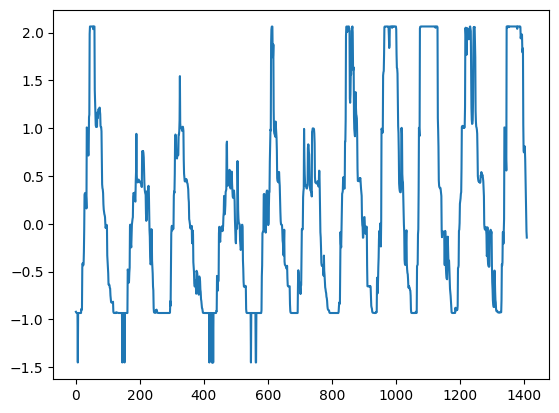

In [262]:
pyplot.plot(smoothed_y)

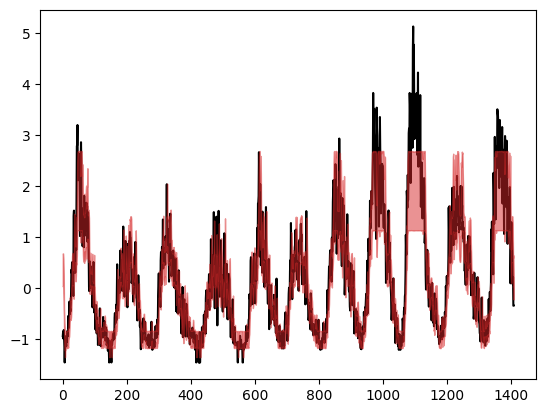

In [297]:
states = model.filter(x_te)
mu = numpy.dot(states, model.observations.mus)
std = numpy.dot(states, numpy.sqrt(model.observations.Sigmas.diagonal(axis1=1, axis2=2)))
lb, ub = mu - 1.96 * std, mu + 1.96 * std
pyplot.rcdefaults()
pyplot.plot(x_te, 'k')
#pyplot.plot(mean)
pyplot.fill_between(range(mu.shape[0]), lb[:,0], ub[:,0], color='C3', zorder=9, alpha=.5)

In [321]:
N = x_tr.shape[1]
D = 1
lds = LDS(N, D, emissions='gaussian_nn')
#lds.initialize(x_tr)
q_lem_elbos, q_lem = lds.fit(x_tr, method="laplace_em", variational_posterior="structured_meanfield",
                             num_iters=10, initialize=False)

AssertionError: 

In [319]:
q_lem.model.emissions.params, q_lem.model.emissions.Cs, q_lem.model.emissions.ds

((array([[[-0.46013459]]]),
  array([], shape=(1, 1, 0), dtype=float64),
  array([[0.28633351]]),
  array([[-2.48014171]])),
 array([[[-0.46013459]]]),
 array([[0.28633351]]))

In [320]:
numpy.q_lem.model.emissions.inv_etas)

array([[-2.48014171]])

In [227]:
q_lem_x = q_lem.sample()[0][1]
q_lem_x

array([[ 0.17080026],
       [ 0.20379359],
       [-0.71897974],
       ...,
       [ 2.38277002],
       [ 1.69468322],
       [ 2.7082051 ]])

In [84]:
q_lem_y = lds.smooth(q_lem_x, x_tr)

In [85]:
q_lem_y

array([[ 0.16765195],
       [ 0.38763427],
       [ 0.4776937 ],
       ...,
       [-0.80016715],
       [-0.52738944],
       [-0.66977188]])

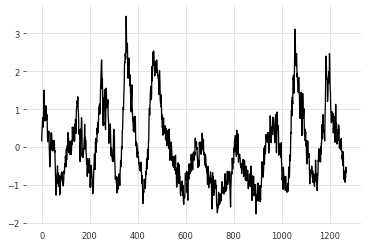

In [86]:
pyplot.plot(q_lem_y)

In [104]:
q_mean, q_post = lds.approximate_posterior(x_te)

  0%|          | 0/100 [00:00<?, ?it/s]

In [180]:
q_lem_x = []
for i in range(1000):
    q_lem_x.append(numpy.array([q_post.sample()[0][1]]))
q_lem_x = numpy.concatenate(q_lem_x, axis=0)

In [181]:
q_lem_y = lds.emissions.Cs * q_lem_x + lds.emissions.ds

In [182]:
mean, std = numpy.mean(q_lem_y, axis=0), numpy.std(q_lem_y, axis=0)
lb, ub = mean - 1.96 * std, mean + 1.96 * std

In [185]:
lds.

0

In [176]:
lds.emissions.Cs, lds.emissions.ds

(array([[[-0.46013459]]]), array([[0.28633351]]))

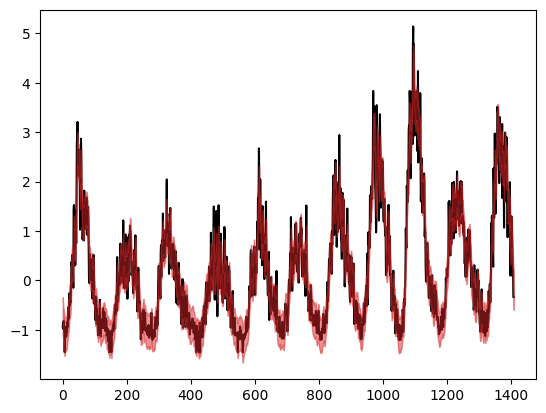

In [186]:
pyplot.rcdefaults()
pyplot.plot(x_te, 'k')
#pyplot.plot(mean)
pyplot.fill_between(range(mean.shape[0]), lb[:,0], ub[:,0], color='C3', zorder=9, alpha=.5)

In [ ]:
lds.emissions.

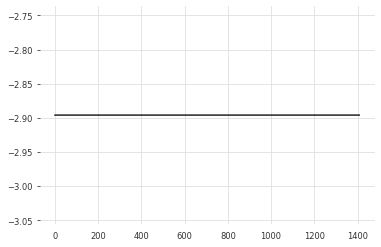

In [49]:
pyplot.plot(q_post.continuous_state_params[0]['J_dyn_21'][:,0,0])

In [55]:
q

TypeError: exceptions must derive from BaseException